Take a look at:
https://github.com/lzane/Fingers-Detection-using-OpenCV-and-Python

me: 131_

In [14]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

from skimage import io, transform

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

import timeit, random
import json, cv2

%load_ext autoreload
%autoreload 2

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image
    
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

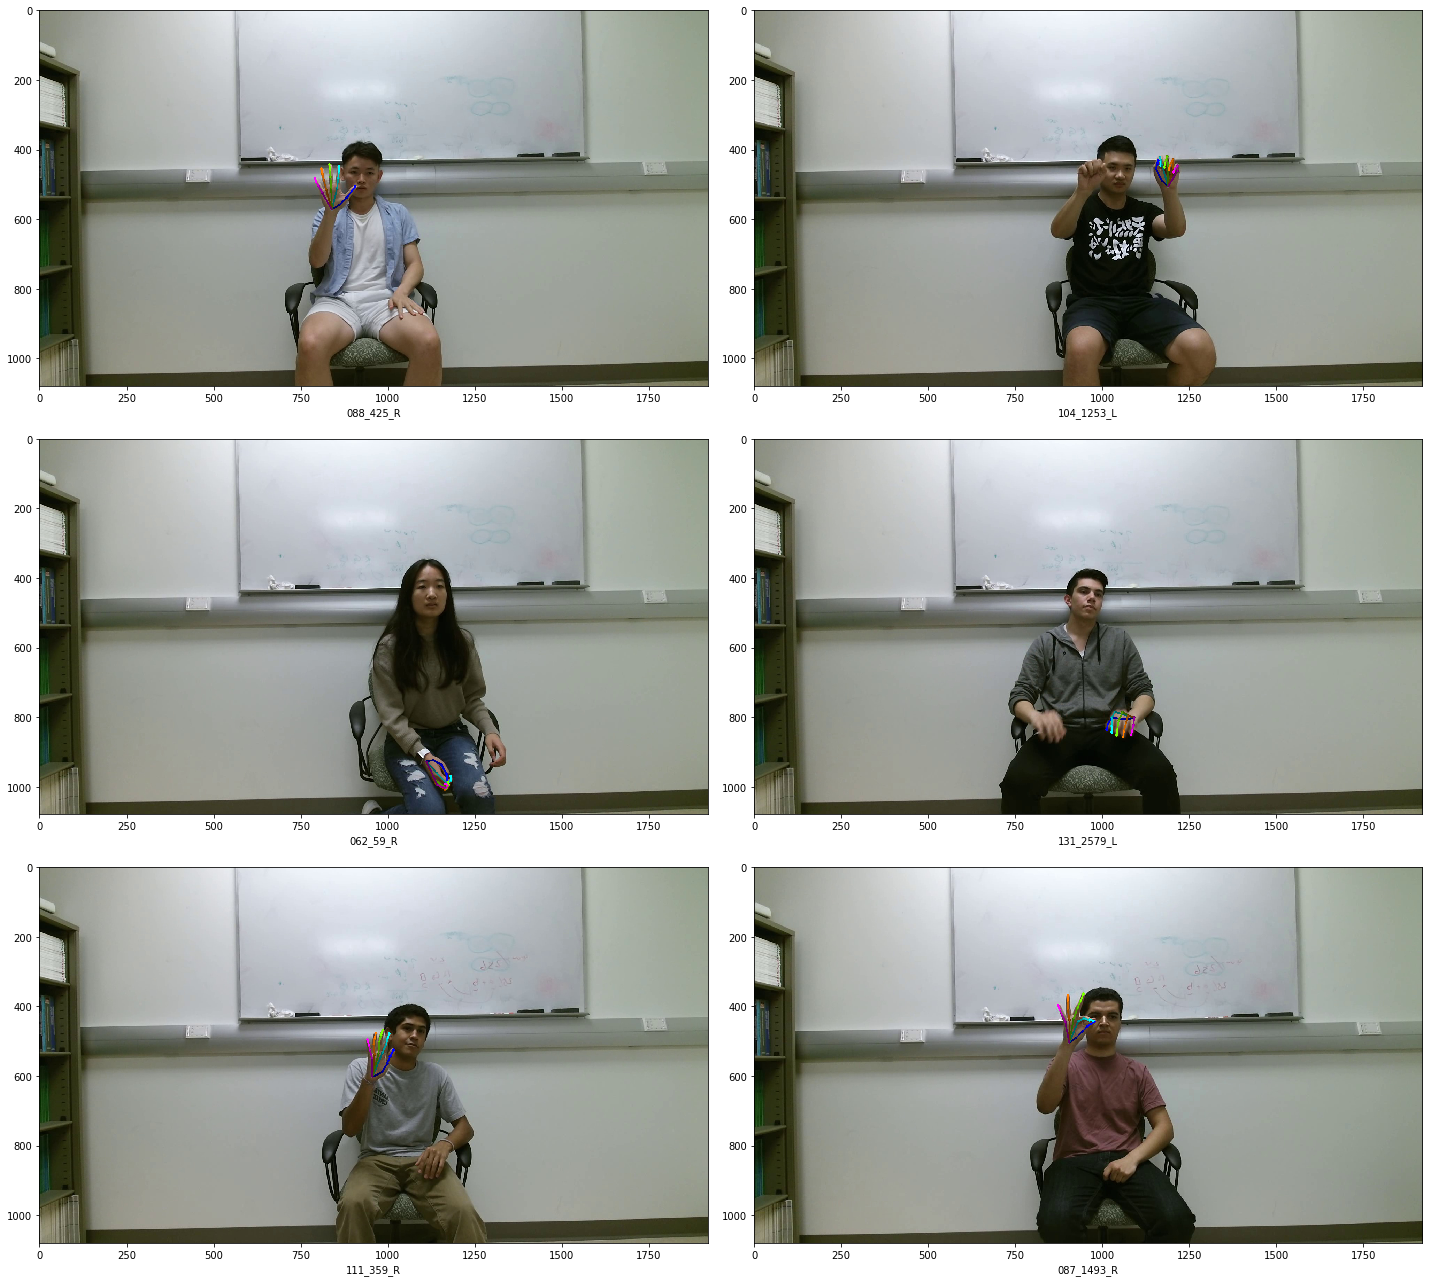

In [16]:
num = 6
fix, ax = plt.subplots(num//2, 2, figsize=(20, num*3))
ax = [a for b in ax for a in b] # wooooo
for j, k in enumerate(random.sample(range(0, 94126), num)):
    canvas = cv2.imread("Dataset/Images/" + names[k][:-2] + ".jpg")
    tmp = []
    for i in xrange(len(Joints[names[k]])):
        tmp.append([int(Joints[names[k]][i][0]), int(Joints[names[k]][i][1])])
    canvas = show.draw_hand(canvas, tmp)
    ax[j].set_xlabel(names[k])
    ax[j].imshow(canvas[:,:,::-1])
    
plt.tight_layout()
plt.show()

In [6]:
# Dataset class for memory efficient data processing 
class HandGestureDataset(Dataset):
    """ Hand Gesture Dataset """

    def __init__(self, root_dir, transform=False):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.joints = json.load(open(self.root_dir+"/annotation.json","r"))
        self.names = self.joints.keys()
#         self.images =  ## Can't load all 12G worth of images
        self.transform = transform

    def __len__(self):
        return len(self.names)

    def __getitem__(self, idx):
        idx = np.random.randint(0, len(self.names))
        img_name = os.path.join(self.root_dir,
                                self.names[idx])
        
        image = cv2.imread("Dataset/Images/" + self.names[idx] + ".jpg")
        J = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        sample = {'image': image, 'joints': J}

        if self.transform:
            sample = self.transform(sample)

        return sample
    
    def transform(self, sample):
        

In [ ]:
# DataLoader class to create a muli-process iterator and load data into memory faster
data = HandGestureDataset()
dataloader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True, num_workers=4)

In [ ]:
### In case we want to use color histograms
# from cs175utils.features import color_histogram_hsv, hog_feature
# from cs175.features import *

# num_color_bins = 10 # Number of bins in the color histogram
# feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
# X_train_feats = extract_features(X_train, feature_fns, verbose=True)
# X_val_feats = extract_features(X_val, feature_fns)
# X_test_feats = extract_features(X_test, feature_fns)

# # Preprocessing: Subtract the mean feature
# mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
# X_train_feats -= mean_feat
# X_val_feats -= mean_feat
# X_test_feats -= mean_feat

# # Preprocessing: Divide by standard deviation. This ensures that each feature
# # has roughly the same scale.
# std_feat = np.std(X_train_feats, axis=0, keepdims=True)
# X_train_feats /= std_feat
# X_val_feats /= std_feat
# X_test_feats /= std_feat

# # Preprocessing: Add a bias dimension
# X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
# X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
# X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])